In [1]:
import keras.layers as kl
from keras.models import Sequential

In [2]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [3]:
import csv, os, numpy as np

ACTION_LABELS_PATH = os.path.join("../action-recognition/action-labels.csv")
KEYPOINTS_PATH = os.path.join("../action-recognition/keypoints_data/")

# How many video records / training data each label should have
trainings_per_label = 100

# How many frames each video record / training data should have
frames_per_training = 15

action_labels = []
with open(ACTION_LABELS_PATH) as f:
    csv_reader = csv.reader(f, delimiter=",")
    action_labels = [each[1] for each in csv_reader]

action_mapping = {}
with open(ACTION_LABELS_PATH) as f:
    csv_reader = csv.reader(f, delimiter=",")
    action_mapping = {each[1]: each[0] for each in csv_reader}
    
action_mapping

features, labels = [], []

for action in action_labels:
    for trainingNum in range(trainings_per_label):
        sequence = np.load(os.path.join(KEYPOINTS_PATH, action, f"{trainingNum}.npy"))
        features.append(sequence)
        labels.append(action_mapping[action])


In [4]:
X = np.array(features)
X.shape

(300, 15, 219)

In [5]:
y = to_categorical(labels).astype(int)
y.shape

(300, 3)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=69)
modelInputShape = (X.shape[1], X.shape[2])
modelOutputShape = y.shape[1]

In [18]:
X_test.shape

(75, 15, 219)

In [7]:
stats = {}

In [8]:
from time import time
from sklearn.metrics import accuracy_score

In [9]:

from timeit import timeit
testIter = 100

In [10]:
from matplotlib import pyplot as plt
from keras.models import clone_model

In [11]:

%matplotlib inline
def constructEpochGraph(model, epochs=30):
    thisStats = {
        "trainingTime": [], 
        "testingTime": [], 
        "accuracy": [], 
        "loss": [], 
        "categorical_accuracy": []
    }

    initial = clone_model(model)

    for e in range(1, epochs + 1):
        model.set_weights(initial.get_weights())
        startTime = time()
        model.fit(X_train, y_train, epochs=e, verbose=0)
        thisStats['trainingTime'].append(time() - startTime)

        startTime = time()
        predictResults = model.predict(X_test)
        model.predict(X_test, verbose=0)
        thisStats['testingTime'].append(time() - startTime)

        y_actual = np.argmax(y_test, axis=1)
        y_predict = np.argmax(predictResults, axis=1)
        thisStats['accuracy'].append(accuracy_score(y_actual, y_predict))

        
        # thisStats['categorical_accuracy'].append(model.history.history['categorical_accuracy'][-1])
        # thisStats['loss'].append(model.history.history['loss'][-1])

        print(f"Epoch {e} done!")


    xAxis = [i for i in range(1, epochs + 1)]

    def drawGraph(yAxis, title):
        ax = plt.plot(xAxis, yAxis)
        for i,j in zip(xAxis,yAxis):
            plt.text(i, j, str(round(j, 3)))
        plt.title(title)
        plt.show()

    drawGraph(thisStats['trainingTime'], "Training Time")
    drawGraph(thisStats['testingTime'], "Testing Time")
    drawGraph(thisStats['accuracy'], "Accuracy")
    

### 3 LSTM + 3 Dense

In [106]:
model_1 = Sequential()
model_1.add(kl.LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputShape))
model_1.add(kl.LSTM(units=128, activation='relu', return_sequences=True))
model_1.add(kl.LSTM(units=64, activation='relu', return_sequences=False))
model_1.add(kl.Dense(units=64, activation='relu'))
model_1.add(kl.Dense(units=32, activation='relu'))
model_1.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

3/3 [==============================] - 1s 17ms/step
Epoch 1 done!
3/3 [==============================] - 0s 13ms/step
Epoch 2 done!
3/3 [==============================] - 0s 15ms/step
Epoch 3 done!
3/3 [==============================] - 0s 11ms/step
Epoch 4 done!
3/3 [==============================] - 0s 17ms/step
Epoch 5 done!
3/3 [==============================] - 0s 13ms/step
Epoch 6 done!
3/3 [==============================] - 0s 13ms/step
Epoch 7 done!
3/3 [==============================] - 0s 12ms/step
Epoch 8 done!
3/3 [==============================] - 0s 12ms/step
Epoch 9 done!
3/3 [==============================] - 0s 12ms/step
Epoch 10 done!
3/3 [==============================] - 0s 11ms/step
Epoch 11 done!
3/3 [==============================] - 0s 15ms/step
Epoch 12 done!
3/3 [==============================] - 0s 11ms/step
Epoch 13 done!
3/3 [==============================] - 0s 11ms/step
Epoch 14 done!
3/3 [==============================] - 0s 11ms/step
Epoch 15 done!
3/3 

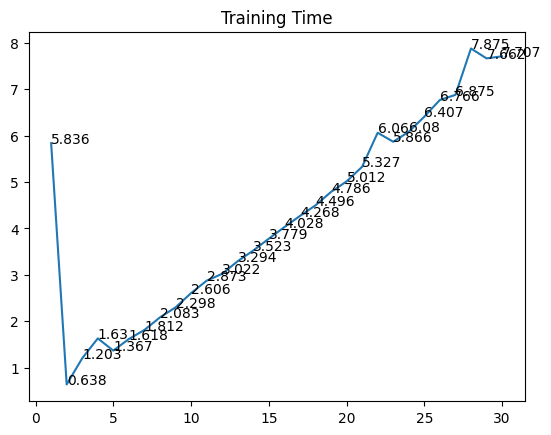

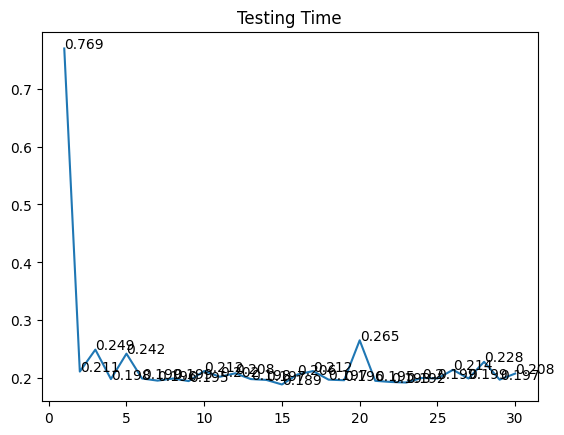

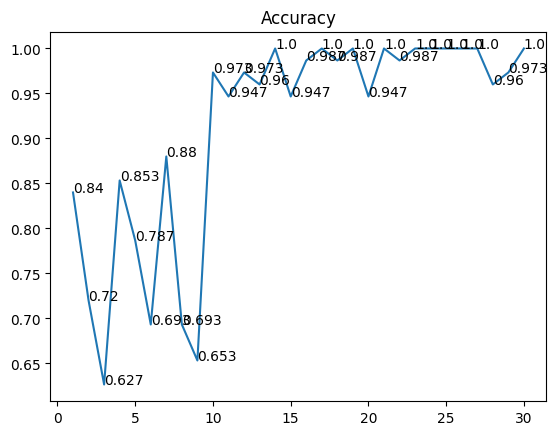

In [107]:
constructEpochGraph(model_1, epochs=30)

In [108]:
model_1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 15, 64)            72704     
                                                                 
 lstm_55 (LSTM)              (None, 15, 128)           98816     
                                                                 
 lstm_56 (LSTM)              (None, 64)                49408     
                                                                 
 dense_54 (Dense)            (None, 64)                4160      
                                                                 
 dense_55 (Dense)            (None, 32)                2080      
                                                                 
 dense_56 (Dense)            (None, 3)                 99        
                                                                 
Total params: 227,267
Trainable params: 227,267
Non-t

# LTESFNKNK

In [112]:
model_g = Sequential()
model_g.add(kl.LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputShape))

model_g.add(kl.LSTM(units=128, activation='relu', return_sequences=True))
model_g.add(kl.LSTM(units=64, activation='relu', return_sequences=False))
model_g.add(kl.Dense(units=64, activation='relu'))
model_g.add(kl.Dropout(0.5))
model_g.add(kl.Dense(units=32, activation='relu'))
model_g.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_g.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

3/3 [==============================] - 1s 12ms/step
Epoch 1 done!
3/3 [==============================] - 0s 16ms/step
Epoch 2 done!
3/3 [==============================] - 0s 11ms/step
Epoch 3 done!
3/3 [==============================] - 0s 12ms/step
Epoch 4 done!
3/3 [==============================] - 0s 19ms/step
Epoch 5 done!
3/3 [==============================] - 0s 15ms/step
Epoch 6 done!
3/3 [==============================] - 0s 13ms/step
Epoch 7 done!
3/3 [==============================] - 0s 11ms/step
Epoch 8 done!
3/3 [==============================] - 0s 12ms/step
Epoch 9 done!
3/3 [==============================] - 0s 15ms/step
Epoch 10 done!
3/3 [==============================] - 0s 15ms/step
Epoch 11 done!
3/3 [==============================] - 0s 12ms/step
Epoch 12 done!
3/3 [==============================] - 0s 10ms/step
Epoch 13 done!
3/3 [==============================] - 0s 13ms/step
Epoch 14 done!
3/3 [==============================] - 0s 15ms/step
Epoch 15 done!
3/3 

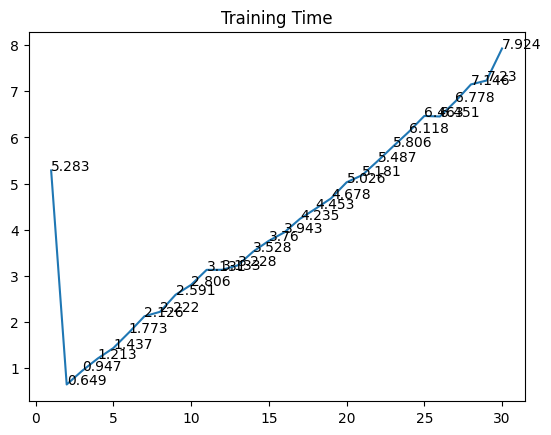

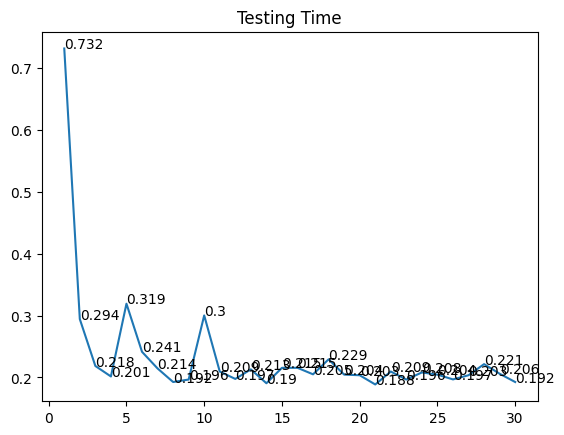

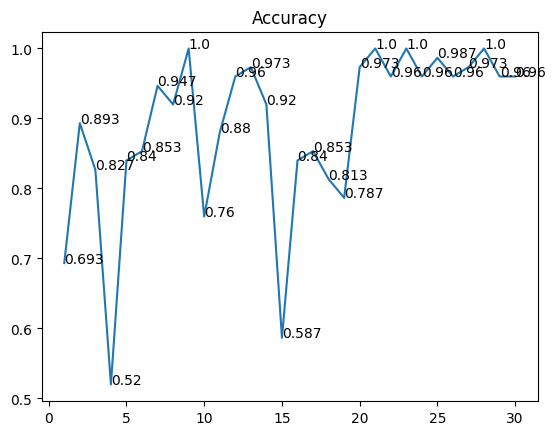

In [113]:
constructEpochGraph(model_g)

In [114]:
model_g.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 15, 64)            72704     
                                                                 
 lstm_61 (LSTM)              (None, 15, 128)           98816     
                                                                 
 lstm_62 (LSTM)              (None, 64)                49408     
                                                                 
 dense_60 (Dense)            (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_61 (Dense)            (None, 32)                2080      
                                                                 
 dense_62 (Dense)            (None, 3)               

3/3 [==============================] - 1s 15ms/step
Epoch 1 done!
3/3 [==============================] - 0s 11ms/step
Epoch 2 done!
3/3 [==============================] - 0s 15ms/step
Epoch 3 done!
3/3 [==============================] - 0s 10ms/step
Epoch 4 done!
3/3 [==============================] - 0s 12ms/step
Epoch 5 done!
3/3 [==============================] - 0s 13ms/step
Epoch 6 done!
3/3 [==============================] - 0s 11ms/step
Epoch 7 done!
3/3 [==============================] - 0s 13ms/step
Epoch 8 done!
3/3 [==============================] - 0s 12ms/step
Epoch 9 done!
3/3 [==============================] - 0s 13ms/step
Epoch 10 done!
3/3 [==============================] - 0s 13ms/step
Epoch 11 done!
3/3 [==============================] - 0s 13ms/step
Epoch 12 done!
3/3 [==============================] - 0s 11ms/step
Epoch 13 done!
3/3 [==============================] - 0s 13ms/step
Epoch 14 done!
3/3 [==============================] - 0s 11ms/step
Epoch 15 done!
3/3 

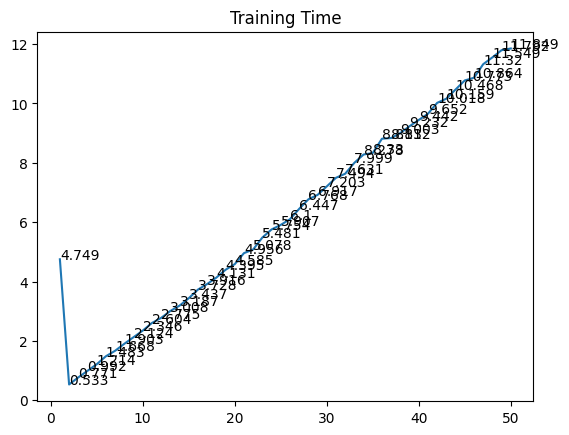

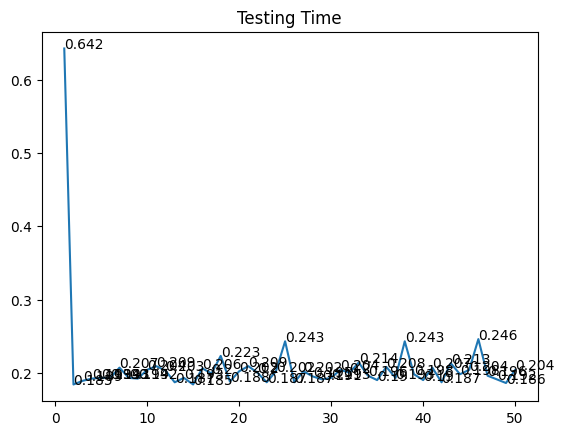

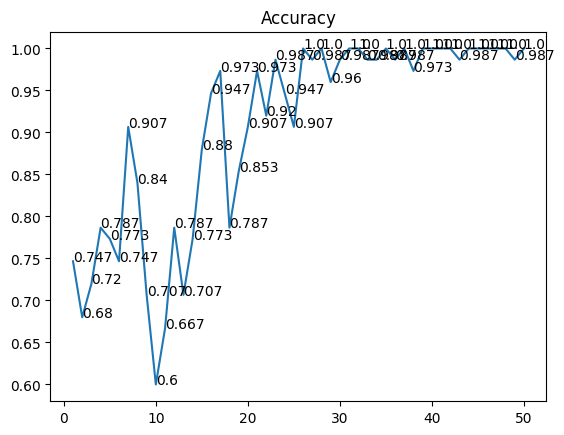

In [118]:
model_g2 = Sequential()
model_g2.add(kl.LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputShape, dropout=0.5))
model_g2.add(kl.LSTM(units=128, activation='relu', return_sequences=True))
model_g2.add(kl.LSTM(units=64, activation='relu', return_sequences=False))
model_g2.add(kl.Dense(units=64, activation='relu'))
model_g2.add(kl.Dense(units=32, activation='relu'))
model_g2.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_g2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

constructEpochGraph(model_g2, epochs=50)

3/3 [==============================] - 1s 12ms/step
Epoch 1 done!
3/3 [==============================] - 0s 13ms/step
Epoch 2 done!
3/3 [==============================] - 0s 13ms/step
Epoch 3 done!
3/3 [==============================] - 0s 11ms/step
Epoch 4 done!
3/3 [==============================] - 0s 13ms/step
Epoch 5 done!
3/3 [==============================] - 0s 15ms/step
Epoch 6 done!
3/3 [==============================] - 0s 12ms/step
Epoch 7 done!
3/3 [==============================] - 0s 15ms/step
Epoch 8 done!
3/3 [==============================] - 0s 11ms/step
Epoch 9 done!
3/3 [==============================] - 0s 15ms/step
Epoch 10 done!
3/3 [==============================] - 0s 13ms/step
Epoch 11 done!
3/3 [==============================] - 0s 14ms/step
Epoch 12 done!
3/3 [==============================] - 0s 13ms/step
Epoch 13 done!
3/3 [==============================] - 0s 18ms/step
Epoch 14 done!
3/3 [==============================] - 0s 12ms/step
Epoch 15 done!
3/3 

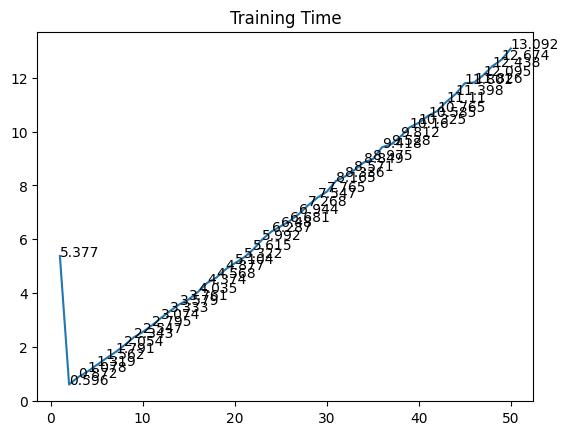

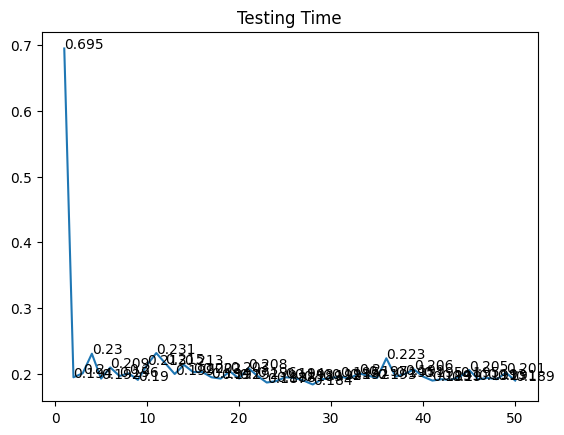

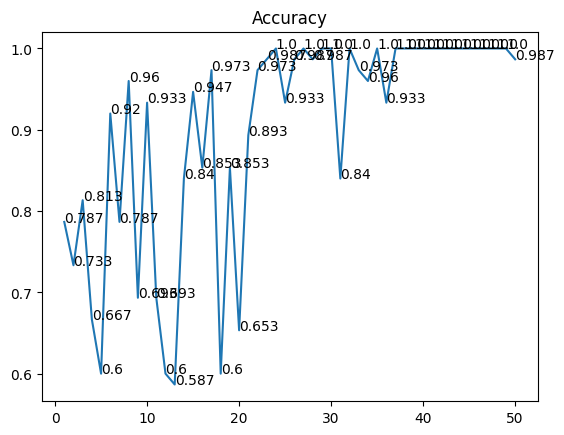

In [116]:
model_g3 = Sequential()
model_g3.add(kl.LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputShape, recurrent_dropout=0.5))
model_g3.add(kl.LSTM(units=128, activation='relu', return_sequences=True))
model_g3.add(kl.LSTM(units=64, activation='relu', return_sequences=False))
model_g3.add(kl.Dense(units=64, activation='relu'))
model_g3.add(kl.Dense(units=32, activation='relu'))
model_g3.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_g3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

constructEpochGraph(model_g3, epochs=50)

3/3 [==============================] - 1s 13ms/step
Epoch 1 done!
3/3 [==============================] - 0s 13ms/step
Epoch 2 done!
3/3 [==============================] - 0s 12ms/step
Epoch 3 done!
3/3 [==============================] - 0s 11ms/step
Epoch 4 done!
3/3 [==============================] - 0s 10ms/step
Epoch 5 done!
3/3 [==============================] - 0s 10ms/step
Epoch 6 done!
3/3 [==============================] - 0s 10ms/step
Epoch 7 done!
3/3 [==============================] - 0s 12ms/step
Epoch 8 done!
3/3 [==============================] - 0s 12ms/step
Epoch 9 done!
3/3 [==============================] - 0s 11ms/step
Epoch 10 done!
3/3 [==============================] - 0s 11ms/step
Epoch 11 done!
3/3 [==============================] - 0s 10ms/step
Epoch 12 done!
3/3 [==============================] - 0s 14ms/step
Epoch 13 done!
3/3 [==============================] - 0s 12ms/step
Epoch 14 done!
3/3 [==============================] - 0s 11ms/step
Epoch 15 done!
3/3 

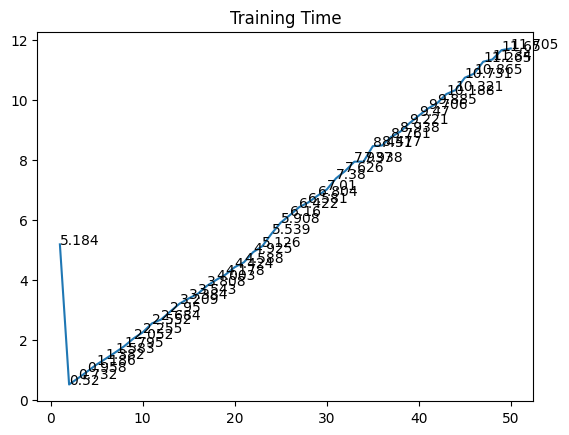

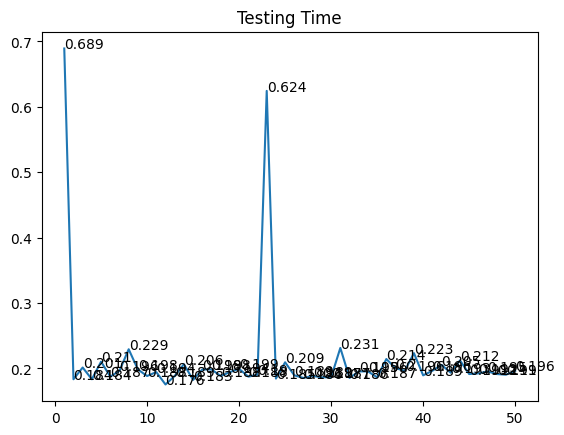

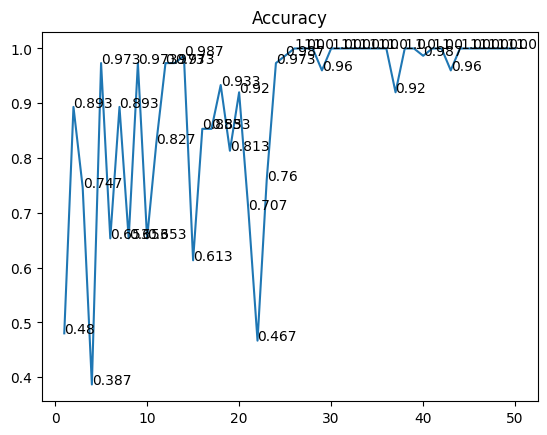

In [120]:
model_g4 = Sequential()
model_g4.add(kl.LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputShape, recurrent_dropout=0.5))
model_g4.add(kl.LSTM(units=128, activation='relu', return_sequences=True))
model_g4.add(kl.LSTM(units=64, activation='relu', return_sequences=False))
model_g4.add(kl.Dense(units=128, activation='relu'))
model_g4.add(kl.Dense(units=64, activation='relu'))
model_g4.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_g4.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

constructEpochGraph(model_g4, epochs=50)

3/3 [==============================] - 0s 13ms/step
Epoch 1 done!
3/3 [==============================] - 0s 11ms/step
Epoch 2 done!
3/3 [==============================] - 0s 12ms/step
Epoch 3 done!
3/3 [==============================] - 0s 9ms/step
Epoch 4 done!
3/3 [==============================] - 0s 10ms/step
Epoch 5 done!
3/3 [==============================] - 0s 12ms/step
Epoch 6 done!
3/3 [==============================] - 0s 10ms/step
Epoch 7 done!
3/3 [==============================] - 0s 14ms/step
Epoch 8 done!
3/3 [==============================] - 0s 10ms/step
Epoch 9 done!
3/3 [==============================] - 0s 10ms/step
Epoch 10 done!
3/3 [==============================] - 0s 11ms/step
Epoch 11 done!
3/3 [==============================] - 0s 11ms/step
Epoch 12 done!
3/3 [==============================] - 0s 11ms/step
Epoch 13 done!
3/3 [==============================] - 0s 10ms/step
Epoch 14 done!
3/3 [==============================] - 0s 13ms/step
Epoch 15 done!
3/3 [

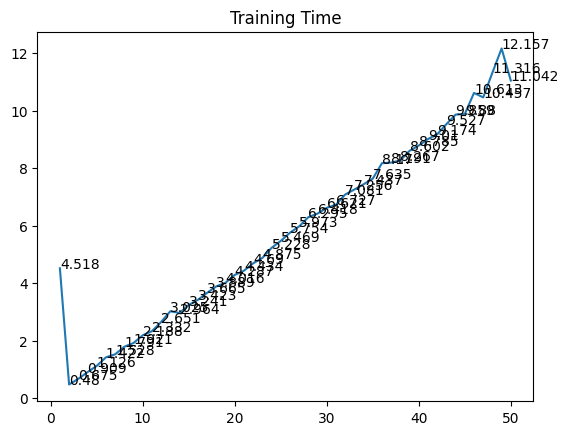

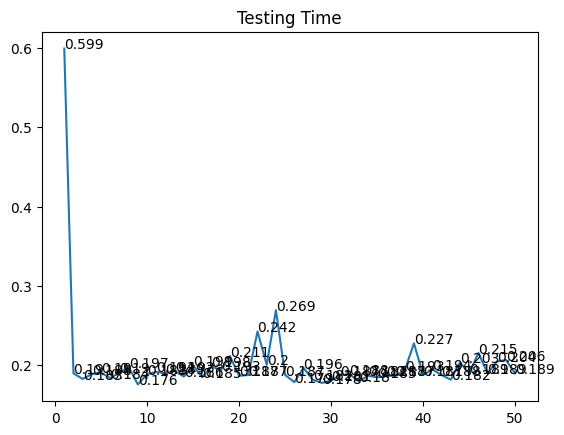

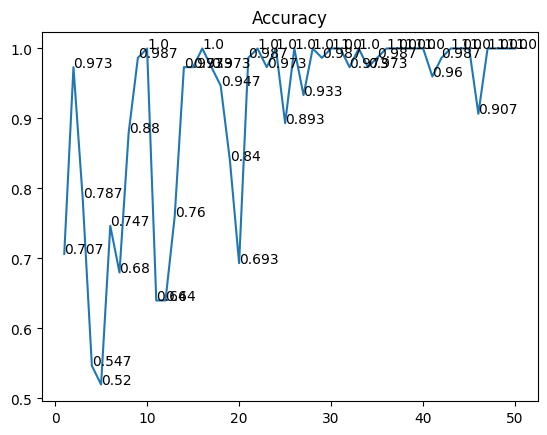

In [122]:
model_g5 = Sequential()
model_g5.add(kl.LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputShape, dropout=0.5))
model_g5.add(kl.LSTM(units=128, activation='relu', return_sequences=True))
model_g5.add(kl.LSTM(units=64, activation='relu', return_sequences=False))
model_g5.add(kl.Dense(units=128, activation='relu'))
model_g5.add(kl.Dense(units=64, activation='relu'))
model_g5.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_g5.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

constructEpochGraph(model_g5, epochs=50)

3/3 [==============================] - 1s 15ms/step
Epoch 1 done!
3/3 [==============================] - 0s 15ms/step
Epoch 2 done!
3/3 [==============================] - 0s 17ms/step
Epoch 3 done!
3/3 [==============================] - 0s 15ms/step
Epoch 4 done!
3/3 [==============================] - 0s 12ms/step
Epoch 5 done!
3/3 [==============================] - 0s 13ms/step
Epoch 6 done!
3/3 [==============================] - 0s 16ms/step
Epoch 7 done!
3/3 [==============================] - 0s 13ms/step
Epoch 8 done!
3/3 [==============================] - 0s 13ms/step
Epoch 9 done!
3/3 [==============================] - 0s 11ms/step
Epoch 10 done!
3/3 [==============================] - 0s 13ms/step
Epoch 11 done!
3/3 [==============================] - 0s 13ms/step
Epoch 12 done!
3/3 [==============================] - 0s 15ms/step
Epoch 13 done!
3/3 [==============================] - 0s 15ms/step
Epoch 14 done!
3/3 [==============================] - 0s 13ms/step
Epoch 15 done!
3/3 

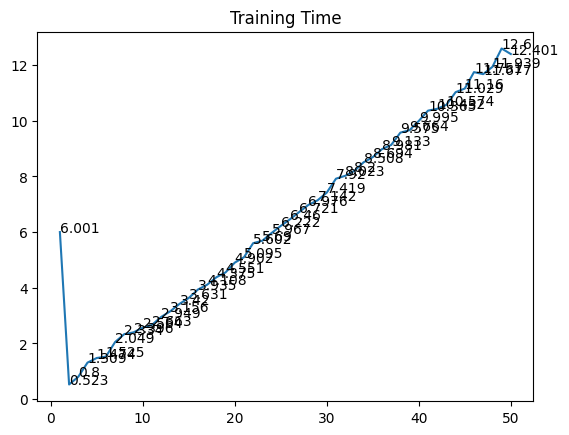

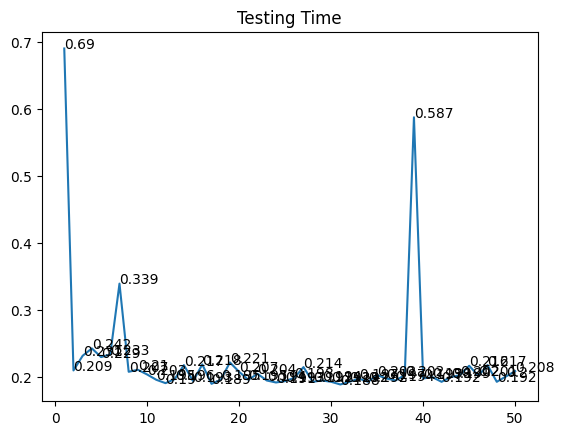

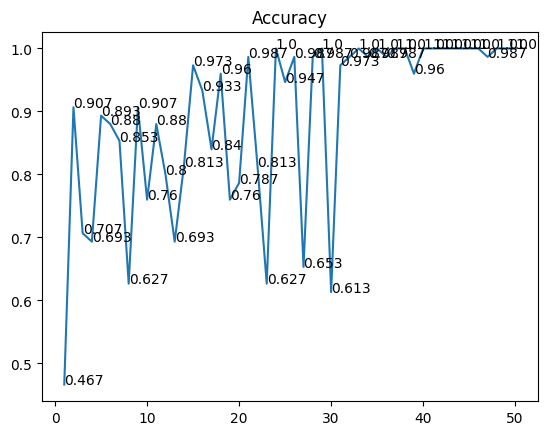

In [123]:
model_g6 = Sequential()
model_g6.add(kl.LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputShape, recurrent_dropout=0.5, dropout=0.5))
model_g6.add(kl.LSTM(units=128, activation='relu', return_sequences=True))
model_g6.add(kl.LSTM(units=64, activation='relu', return_sequences=False))
model_g6.add(kl.Dense(units=128, activation='relu'))
model_g6.add(kl.Dense(units=64, activation='relu'))
model_g6.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_g6.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

constructEpochGraph(model_g6, epochs=50)

3/3 [==============================] - 1s 13ms/step
Epoch 1 done!
3/3 [==============================] - 0s 13ms/step
Epoch 2 done!
3/3 [==============================] - 0s 12ms/step
Epoch 3 done!
3/3 [==============================] - 0s 12ms/step
Epoch 4 done!
3/3 [==============================] - 0s 15ms/step
Epoch 5 done!
3/3 [==============================] - 0s 12ms/step
Epoch 6 done!
3/3 [==============================] - 0s 14ms/step
Epoch 7 done!
3/3 [==============================] - 0s 14ms/step
Epoch 8 done!
3/3 [==============================] - 0s 12ms/step
Epoch 9 done!
3/3 [==============================] - 0s 11ms/step
Epoch 10 done!
3/3 [==============================] - 0s 11ms/step
Epoch 11 done!
3/3 [==============================] - 0s 13ms/step
Epoch 12 done!
3/3 [==============================] - 0s 16ms/step
Epoch 13 done!
3/3 [==============================] - 0s 12ms/step
Epoch 14 done!
3/3 [==============================] - 0s 11ms/step
Epoch 15 done!
3/3 

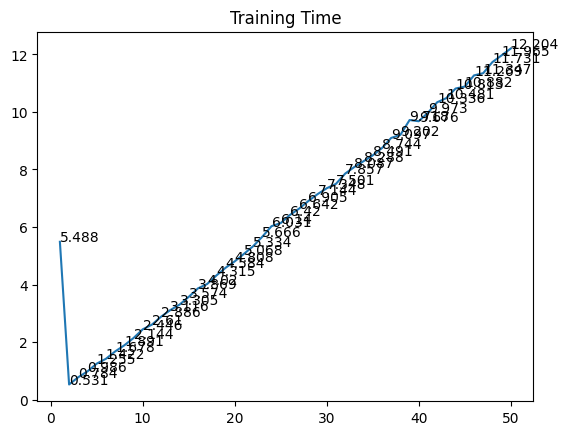

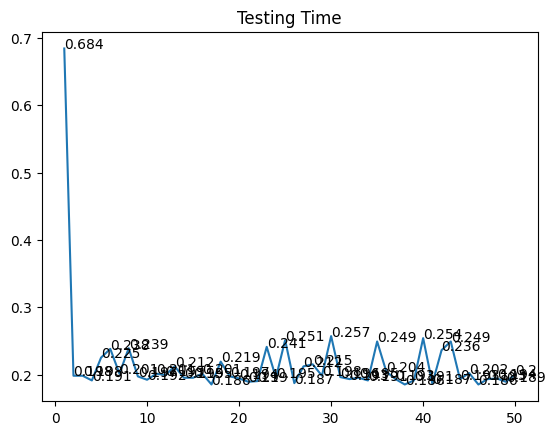

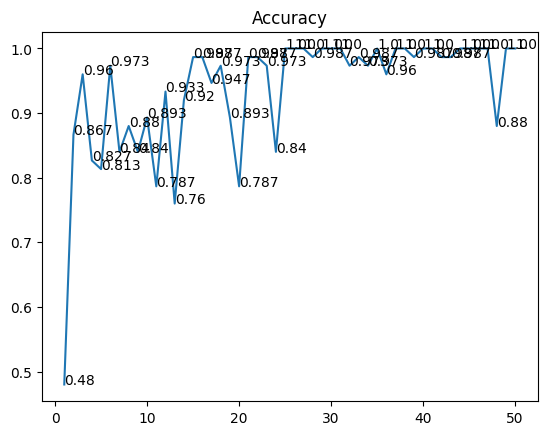

In [124]:
model_g7 = Sequential()
model_g7.add(kl.LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputShape, recurrent_dropout=0.5, dropout=0.5))
model_g7.add(kl.LSTM(units=128, activation='relu', return_sequences=True))
model_g7.add(kl.LSTM(units=64, activation='relu', return_sequences=False))
model_g7.add(kl.Dense(units=64, activation='relu'))
model_g7.add(kl.Dropout(0.5))
model_g7.add(kl.Dense(units=32, activation='relu'))
model_g7.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_g7.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

constructEpochGraph(model_g7, epochs=50)

3/3 [==============================] - 1s 10ms/step
Epoch 1 done!
3/3 [==============================] - 0s 7ms/step
Epoch 2 done!
3/3 [==============================] - 0s 8ms/step
Epoch 3 done!
3/3 [==============================] - 0s 7ms/step
Epoch 4 done!
3/3 [==============================] - 0s 11ms/step
Epoch 5 done!
3/3 [==============================] - 0s 8ms/step
Epoch 6 done!
3/3 [==============================] - 0s 7ms/step
Epoch 7 done!
3/3 [==============================] - 0s 8ms/step
Epoch 8 done!
3/3 [==============================] - 0s 7ms/step
Epoch 9 done!
3/3 [==============================] - 0s 8ms/step
Epoch 10 done!
3/3 [==============================] - 0s 8ms/step
Epoch 11 done!
3/3 [==============================] - 0s 9ms/step
Epoch 12 done!
3/3 [==============================] - 0s 8ms/step
Epoch 13 done!
3/3 [==============================] - 0s 7ms/step
Epoch 14 done!
3/3 [==============================] - 0s 8ms/step
Epoch 15 done!
3/3 [============

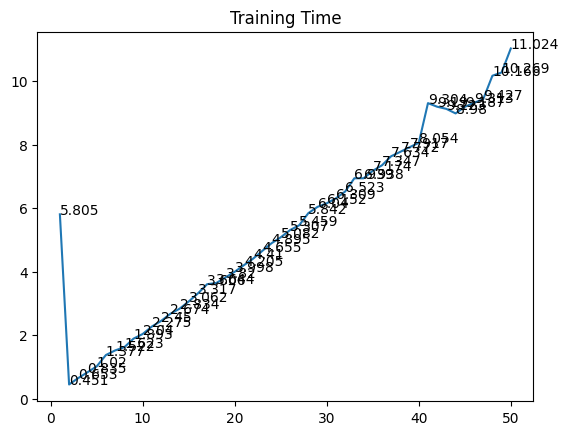

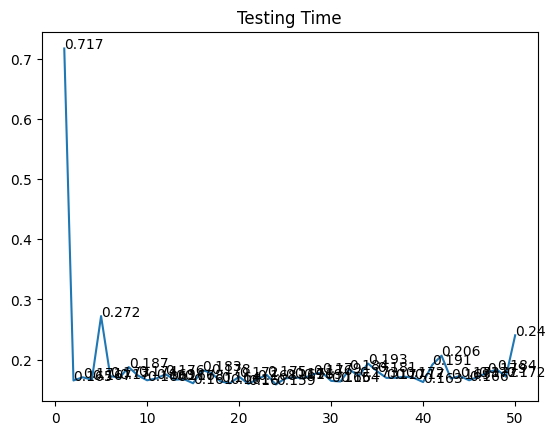

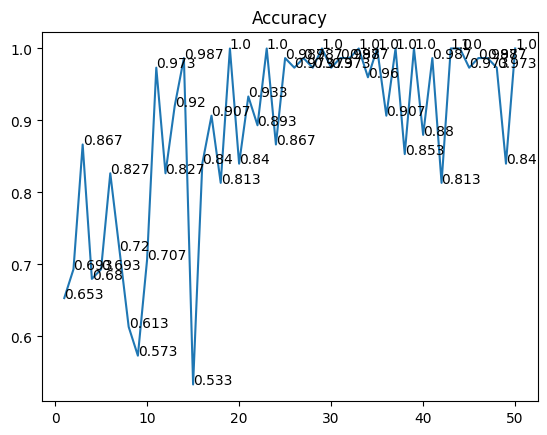

In [12]:
model_g8 = Sequential()
model_g8.add(kl.LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputShape, recurrent_dropout=0.5, dropout=0.5))
model_g8.add(kl.LSTM(units=128, activation='relu', return_sequences=True))
model_g8.add(kl.LSTM(units=64, activation='relu', return_sequences=False))
model_g8.add(kl.Dropout(0.5))
model_g8.add(kl.Dense(units=64, activation='relu'))
model_g8.add(kl.Dense(units=32, activation='relu'))
model_g8.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_g8.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

constructEpochGraph(model_g8, epochs=50)

In [13]:
model_g8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 64)            72704     
                                                                 
 lstm_1 (LSTM)               (None, 15, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 9

3/3 [==============================] - 1s 17ms/step
Epoch 1 done!
3/3 [==============================] - 0s 14ms/step
Epoch 2 done!
3/3 [==============================] - 0s 16ms/step
Epoch 3 done!
3/3 [==============================] - 0s 13ms/step
Epoch 4 done!
3/3 [==============================] - 0s 14ms/step
Epoch 5 done!
3/3 [==============================] - 0s 15ms/step
Epoch 6 done!
3/3 [==============================] - 0s 14ms/step
Epoch 7 done!
3/3 [==============================] - 0s 15ms/step
Epoch 8 done!
3/3 [==============================] - 0s 15ms/step
Epoch 9 done!
3/3 [==============================] - 0s 13ms/step
Epoch 10 done!
3/3 [==============================] - 0s 15ms/step
Epoch 11 done!
3/3 [==============================] - 0s 15ms/step
Epoch 12 done!
3/3 [==============================] - 0s 14ms/step
Epoch 13 done!
3/3 [==============================] - 0s 13ms/step
Epoch 14 done!
3/3 [==============================] - 0s 14ms/step
Epoch 15 done!
3/3 

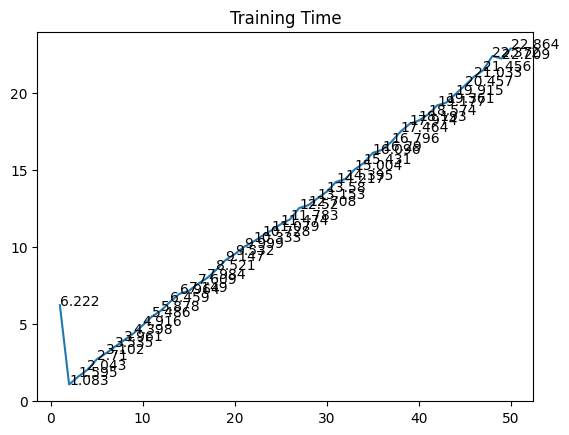

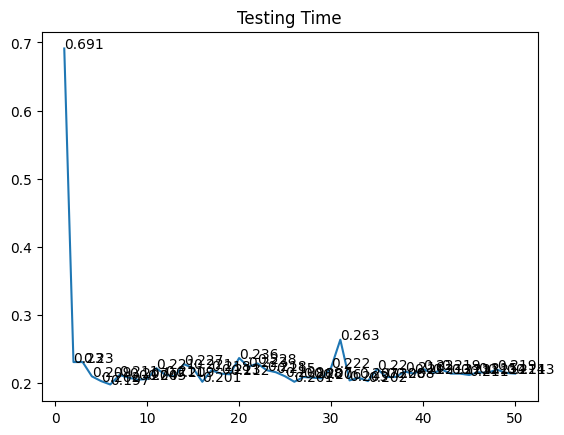

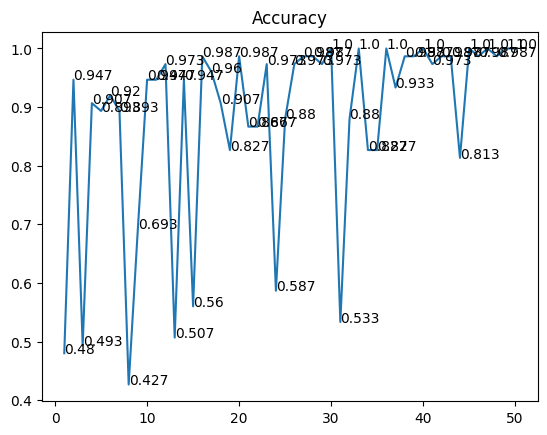

In [14]:
model_g9 = Sequential()
model_g9.add(kl.LSTM(units=200, activation='relu', return_sequences=True, input_shape=modelInputShape, recurrent_dropout=0.5, dropout=0.5))
model_g9.add(kl.LSTM(units=150, activation='relu', return_sequences=True))
model_g9.add(kl.LSTM(units=100, activation='relu', return_sequences=False))
model_g9.add(kl.Dropout(0.5))
model_g9.add(kl.Dense(units=64, activation='relu'))
model_g9.add(kl.Dense(units=32, activation='relu'))
model_g9.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_g9.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

constructEpochGraph(model_g9, epochs=50)

In [15]:
model_g9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 15, 200)           336000    
                                                                 
 lstm_4 (LSTM)               (None, 15, 150)           210600    
                                                                 
 lstm_5 (LSTM)               (None, 100)               100400    
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                6464      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                

### LSTM + 2 GRU + 3 Dense

In [1]:
model_2 = Sequential()
model_2.add(kl.LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputShape))
model_2.add(kl.GRU(128, return_sequences=True))
model_2.add(kl.GRU(units=64, return_sequences=False))
model_2.add(kl.Dense(units=64, activation='relu'))
model_2.add(kl.Dense(units=32, activation='relu'))
model_2.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

NameError: name 'Sequential' is not defined

In [ ]:
m2stats = {}
startTime = time()
model_2.fit(X_train, y_train, epochs=30)
m2stats['trainingTime'] = time() - startTime

Epoch 1/30


8/8 [==============================] - 5s 24ms/step - loss: 0.9976 - categorical_accuracy: 0.6133
Epoch 2/30
8/8 [==============================] - 0s 21ms/step - loss: 0.6614 - categorical_accuracy: 0.7956
Epoch 3/30
8/8 [==============================] - 0s 21ms/step - loss: 0.2545 - categorical_accuracy: 0.9511
Epoch 4/30
8/8 [==============================] - 0s 21ms/step - loss: 0.0813 - categorical_accuracy: 0.9822
Epoch 5/30
8/8 [==============================] - 0s 22ms/step - loss: 0.0399 - categorical_accuracy: 0.9956
Epoch 6/30
8/8 [==============================] - 0s 22ms/step - loss: 0.0305 - categorical_accuracy: 0.9956
Epoch 7/30
8/8 [==============================] - 0s 21ms/step - loss: 0.0280 - categorical_accuracy: 0.9956
Epoch 8/30
8/8 [==============================] - 0s 21ms/step - loss: 0.0213 - categorical_accuracy: 0.9956
Epoch 9/30
8/8 [==============================] - 0s 21ms/step - loss: 0.0074 - categorical_accuracy: 1.0000
Epoch 10/30
8/8 [=============

In [ ]:
model_2.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 15, 64)            72704     
                                                                 
 gru_7 (GRU)                 (None, 15, 128)           74496     
                                                                 
 gru_8 (GRU)                 (None, 64)                37248     
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 3)                 99        
                                                                 
Total params: 190,787
Trainable params: 190,787
Non-t

In [ ]:

m2pred = model_2.predict(X_test)
m2stats['testingTime'] = timeit(lambda: model_2.predict(X_test, verbose=0), number=testIter)

y_actual = np.argmax(y_test, axis=1)
y_predict = np.argmax(m2pred, axis=1)
m2stats['accuracy'] = accuracy_score(y_actual, y_predict)
stats['m2'] = m2stats

3/3 [==============================] - 1s 10ms/step


In [ ]:
stats

{'m1': {'trainingTime': 10.499933958053589,
  'testingTime': 8.631413500000235,
  'accuracy': 1.0},
 'm2': {'trainingTime': 10.625319004058838,
  'testingTime': 8.265981300000021,
  'accuracy': 1.0},
 'm3': {'trainingTime': 9.294203758239746,
  'testingTime': 0.994646499999817,
  'accuracy': 1.0},
 'm4': {'trainingTime': 8.696753978729248,
  'testingTime': 0.8457244999999602,
  'accuracy': 1.0}}

### ANother

In [ ]:
model_3 = Sequential()
model_3.add(kl.LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputShape))
model_3.add(kl.GRU(128, return_sequences=True))
model_3.add(kl.SimpleRNN(units=64, return_sequences=False))
model_3.add(kl.Dense(units=64, activation='relu'))
model_3.add(kl.Dense(units=32, activation='relu'))
model_3.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

m3stats = {}
startTime = time()
model_3.fit(X_train, y_train, epochs=30)
m3stats['trainingTime'] = time() - startTime

Epoch 1/30
8/8 [==============================] - 5s 22ms/step - loss: 0.9907 - categorical_accuracy: 0.5333
Epoch 2/30
8/8 [==============================] - 0s 20ms/step - loss: 0.7477 - categorical_accuracy: 0.6578
Epoch 3/30
8/8 [==============================] - 0s 22ms/step - loss: 0.4305 - categorical_accuracy: 0.9289
Epoch 4/30
8/8 [==============================] - 0s 20ms/step - loss: 0.1765 - categorical_accuracy: 0.9733
Epoch 5/30
8/8 [==============================] - 0s 19ms/step - loss: 0.0698 - categorical_accuracy: 0.9867
Epoch 6/30
8/8 [==============================] - 0s 20ms/step - loss: 0.0251 - categorical_accuracy: 0.9956
Epoch 7/30
8/8 [==============================] - 0s 18ms/step - loss: 0.0097 - categorical_accuracy: 1.0000
Epoch 8/30
8/8 [==============================] - 0s 20ms/step - loss: 0.0079 - categorical_accuracy: 1.0000
Epoch 9/30
8/8 [==============================] - 0s 20ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 10/30
8/8 [==

In [ ]:

m3pred = model_3.predict(X_test)
m3stats['testingTime'] = timeit(lambda: model_3.predict(X_test, verbose=0), number=testIter)

y_actual = np.argmax(y_test, axis=1)
y_predict = np.argmax(m3pred, axis=1)
m3stats['accuracy'] = accuracy_score(y_actual, y_predict)
stats['m3'] = m3stats

3/3 [==============================] - 1s 12ms/step


In [ ]:
model_3.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 15, 64)            72704     
                                                                 
 gru_9 (GRU)                 (None, 15, 128)           74496     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 3)                 99        
                                                                 
Total params: 165,891
Trainable params: 165,891
Non-t

In [ ]:
stats

{'m1': {'trainingTime': 10.499933958053589,
  'testingTime': 8.631413500000235,
  'accuracy': 1.0},
 'm2': {'trainingTime': 10.625319004058838,
  'testingTime': 8.265981300000021,
  'accuracy': 1.0},
 'm3': {'trainingTime': 9.543492317199707,
  'testingTime': 8.724061399999755,
  'accuracy': 1.0},
 'm4': {'trainingTime': 8.696753978729248,
  'testingTime': 0.8457244999999602,
  'accuracy': 1.0}}

### ANother

In [ ]:
model_4 = Sequential()
model_4.add(kl.LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputShape))
model_4.add(kl.GRU(128, return_sequences=True))
model_4.add(kl.SimpleRNN(units=64, return_sequences=False))
model_4.add(kl.Dropout(.2))
model_4.add(kl.Dense(units=64, activation='relu'))
model_4.add(kl.Dense(units=32, activation='relu'))
model_4.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_4.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

m4stats = {}
startTime = time()
model_4.fit(X_train, y_train, epochs=30)
m4stats['trainingTime'] = time() - startTime

Epoch 1/30
8/8 [==============================] - 4s 21ms/step - loss: 1.0222 - categorical_accuracy: 0.4800
Epoch 2/30
8/8 [==============================] - 0s 20ms/step - loss: 0.6823 - categorical_accuracy: 0.8356
Epoch 3/30
8/8 [==============================] - 0s 21ms/step - loss: 0.2846 - categorical_accuracy: 0.9733
Epoch 4/30
8/8 [==============================] - 0s 22ms/step - loss: 0.0906 - categorical_accuracy: 0.9867
Epoch 5/30
8/8 [==============================] - 0s 21ms/step - loss: 0.0358 - categorical_accuracy: 0.9911
Epoch 6/30
8/8 [==============================] - 0s 21ms/step - loss: 0.0213 - categorical_accuracy: 0.9956
Epoch 7/30
8/8 [==============================] - 0s 22ms/step - loss: 0.0087 - categorical_accuracy: 1.0000
Epoch 8/30
8/8 [==============================] - 0s 22ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 9/30
8/8 [==============================] - 0s 22ms/step - loss: 0.0101 - categorical_accuracy: 0.9956
Epoch 10/30
8/8 [==

In [ ]:

m4pred = model_4.predict(X_test)
m4stats['testingTime'] = timeit(lambda: model_4.predict(X_test, verbose=0), number=testIter)

y_actual = np.argmax(y_test, axis=1)
y_predict = np.argmax(m4pred, axis=1)
m4stats['accuracy'] = accuracy_score(y_actual, y_predict)
stats['m4'] = m4stats

3/3 [==============================] - 1s 9ms/step


In [ ]:
model_4.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 15, 64)            72704     
                                                                 
 gru_10 (GRU)                (None, 15, 128)           74496     
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dense_33 (Dense)            (None, 3)               

In [ ]:
stats

{'m1': {'trainingTime': 10.499933958053589,
  'testingTime': 8.631413500000235,
  'accuracy': 1.0},
 'm2': {'trainingTime': 10.625319004058838,
  'testingTime': 8.265981300000021,
  'accuracy': 1.0},
 'm3': {'trainingTime': 9.543492317199707,
  'testingTime': 8.724061399999755,
  'accuracy': 1.0},
 'm4': {'trainingTime': 9.670153617858887,
  'testingTime': 8.14717870000004,
  'accuracy': 1.0}}

### Another Git

In [ ]:


model_5 = Sequential()
model_5.add(kl.LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputShape))
model_5.add(kl.GRU(128, return_sequences=True))
model_5.add(kl.SimpleRNN(units=64, return_sequences=False))
model_5.add(kl.Flatten())
model_5.add(kl.Dense(units=128, activation='relu'))
model_5.add(kl.Dropout(0.2))
model_5.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_5.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

m5stats = {}
startTime = time()
model_5.fit(X_train, y_train, epochs=30)
m5stats['trainingTime'] = time() - startTime


Epoch 1/30
8/8 [==============================] - 6s 24ms/step - loss: 0.8578 - categorical_accuracy: 0.5911
Epoch 2/30
8/8 [==============================] - 0s 24ms/step - loss: 0.5598 - categorical_accuracy: 0.7956
Epoch 3/30
8/8 [==============================] - 0s 24ms/step - loss: 0.3044 - categorical_accuracy: 0.8711
Epoch 4/30
8/8 [==============================] - 0s 25ms/step - loss: 0.1358 - categorical_accuracy: 0.9822
Epoch 5/30
8/8 [==============================] - 0s 25ms/step - loss: 0.0543 - categorical_accuracy: 0.9911
Epoch 6/30
8/8 [==============================] - 0s 24ms/step - loss: 0.0446 - categorical_accuracy: 0.9867
Epoch 7/30
8/8 [==============================] - 0s 25ms/step - loss: 0.0210 - categorical_accuracy: 0.9911
Epoch 8/30
8/8 [==============================] - 0s 24ms/step - loss: 0.0069 - categorical_accuracy: 1.0000
Epoch 9/30
8/8 [==============================] - 0s 24ms/step - loss: 0.0031 - categorical_accuracy: 1.0000
Epoch 10/30
8/8 [==

In [ ]:

m5pred = model_5.predict(X_test)
m5stats['testingTime'] = timeit(lambda: model_5.predict(X_test, verbose=0), number=testIter)

y_actual = np.argmax(y_test, axis=1)
y_predict = np.argmax(m5pred, axis=1)
m5stats['accuracy'] = accuracy_score(y_actual, y_predict)
stats['m5'] = m5stats

1/3 [=========>....................] - ETA: 0s

3/3 [==============================] - 0s 10ms/step


In [ ]:
model_5.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 15, 64)            72704     
                                                                 
 gru_11 (GRU)                (None, 15, 128)           74496     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                12352     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 3)               

In [ ]:
stats

{'m1': {'trainingTime': 10.499933958053589,
  'testingTime': 8.631413500000235,
  'accuracy': 1.0},
 'm2': {'trainingTime': 10.625319004058838,
  'testingTime': 8.265981300000021,
  'accuracy': 1.0},
 'm3': {'trainingTime': 9.543492317199707,
  'testingTime': 8.724061399999755,
  'accuracy': 1.0},
 'm4': {'trainingTime': 9.670153617858887,
  'testingTime': 8.14717870000004,
  'accuracy': 1.0},
 'm5': {'trainingTime': 12.172465085983276,
  'testingTime': 8.930334700000003,
  'accuracy': 1.0}}

### Another

In [ ]:


model_6 = Sequential()
model_6.add(kl.LSTM(units=128, activation='swish', return_sequences=True, input_shape=modelInputShape))
model_6.add(kl.LSTM(units=64, activation='swish', return_sequences=True))
model_6.add(kl.LSTM(units=32, activation='swish', return_sequences=False))
model_6.add(kl.Dropout(0.1))
model_6.add(kl.Flatten())
model_6.add(kl.Dense(units=modelOutputShape, activation='softmax'))

model_6.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

m6stats = {}
startTime = time()
model_6.fit(X_train, y_train, epochs=30)
m6stats['trainingTime'] = time() - startTime


Epoch 1/30
8/8 [==============================] - 7s 32ms/step - loss: 1.0959 - categorical_accuracy: 0.3867
Epoch 2/30
8/8 [==============================] - 0s 35ms/step - loss: 1.0335 - categorical_accuracy: 0.5022
Epoch 3/30
8/8 [==============================] - 0s 34ms/step - loss: 0.6694 - categorical_accuracy: 0.7867
Epoch 4/30
8/8 [==============================] - 0s 34ms/step - loss: 0.3624 - categorical_accuracy: 0.9422
Epoch 5/30
8/8 [==============================] - 0s 34ms/step - loss: 0.2048 - categorical_accuracy: 0.9244
Epoch 6/30
8/8 [==============================] - 0s 39ms/step - loss: 0.1373 - categorical_accuracy: 0.9600
Epoch 7/30
8/8 [==============================] - 0s 37ms/step - loss: 0.1751 - categorical_accuracy: 0.9511
Epoch 8/30
8/8 [==============================] - 0s 34ms/step - loss: 0.2718 - categorical_accuracy: 0.9067
Epoch 9/30
8/8 [==============================] - 0s 33ms/step - loss: 0.2419 - categorical_accuracy: 0.8533
Epoch 10/30
8/8 [==

In [ ]:

m6pred = model_6.predict(X_test)
m6stats['testingTime'] = timeit(lambda: model_6.predict(X_test, verbose=0), number=testIter)

y_actual = np.argmax(y_test, axis=1)
y_predict = np.argmax(m6pred, axis=1)
m6stats['accuracy'] = accuracy_score(y_actual, y_predict)
stats['m6'] = m6stats

3/3 [==============================] - 2s 15ms/step


In [ ]:
model_6.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 15, 128)           178176    
                                                                 
 lstm_19 (LSTM)              (None, 15, 64)            49408     
                                                                 
 lstm_20 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_36 (Dense)            (None, 3)                 99        
                                                                 
Total params: 240,099
Trainable params: 240,099
Non-t

In [ ]:
stats

{'m1': {'trainingTime': 10.499933958053589,
  'testingTime': 8.631413500000235,
  'accuracy': 1.0},
 'm2': {'trainingTime': 10.625319004058838,
  'testingTime': 8.265981300000021,
  'accuracy': 1.0},
 'm3': {'trainingTime': 9.543492317199707,
  'testingTime': 8.724061399999755,
  'accuracy': 1.0},
 'm4': {'trainingTime': 9.670153617858887,
  'testingTime': 8.14717870000004,
  'accuracy': 1.0},
 'm5': {'trainingTime': 12.172465085983276,
  'testingTime': 8.930334700000003,
  'accuracy': 1.0},
 'm6': {'trainingTime': 15.21023440361023,
  'testingTime': 11.614888500000234,
  'accuracy': 1.0}}